In [1]:
#import packages
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

ini_data = pd.ExcelFile('Панельные данные_Сектор роста.xlsm')
df = ini_data.parse('Data')

In [2]:
df.drop(['№', 'Год', 'Название'], axis=1, inplace=True)
df = df.rename(columns={"Признак банкротства": "target"}) #target = дефолт (1 или 0)
df.head()

,target,Eq_TL,TL_TA,ShtDebt_Eq,Eq_TA,ShtDebt_TD,ShtDebt_TA,D_EBIT,ND_EBIT,Delta_ShtDebt,Cash_TA,WoC_TA,Cash_S,Cur_rat,Quick_rat,Tan_TA,Intan_TA,EBIT_S,RetEar_TA,NI_S,EBIT_TA,NI_TA,ROE,ROA,ROCE,EBIT_IntEx,AccPay_S,IntEx_S,AccRec_TL,S_TA,TL_Eq,AccRec_TA,CFO_S,CFO_OperPr,CFO_Eq,FCF_TL,lnTA,lnTurnov,Num_empl
0,0,157.465863,0.004556,0.006351,0.717348,1.0,0.004556,0.046795,-0.146269,4.610994,0.018795,0.606947,0.011861,4.364490,0.066813,0.132215,0.0,0.061436,0.605062,0.039564,0.097351,0.062693,0.091389,0.068348,0.087232,11.739958,0.125561,0.005233,172.455393,1.584598,0.006351,0.785634,-0.193541,1.908157,-0.427526,-58.376210,21.637539,0.546696,376
1,0,0.000000,0.000000,0.000000,0.689469,0.0,0.000000,0.000000,-0.551964,0.000000,0.067451,0.542667,0.046694,3.369437,0.218063,0.148554,0.0,0.084596,0.586272,0.070381,0.122201,0.101668,0.150758,0.105956,0.147199,0.000000,0.175044,0.000000,0.000000,1.444532,0.000000,0.745475,0.064392,0.844310,0.134910,0.000000,21.721952,0.409101,376
2,0,0.000000,0.000000,0.000000,0.478085,0.0,0.000000,0.000000,0.476273,0.000000,0.024046,0.368239,0.022090,1.894755,0.046152,0.424870,0.0,-0.046382,0.393996,-0.076911,-0.050489,-0.083722,-0.161020,-0.092264,-0.174795,0.000000,0.431152,0.000000,0.000000,1.088550,0.000000,0.517837,-0.033797,-0.905197,-0.076953,0.000000,21.926716,0.181996,376
3,0,24.849515,0.019192,0.040242,0.476917,1.0,0.019192,0.111569,0.094228,0.000000,0.002983,0.381696,0.002670,1.882382,0.005764,0.378735,0.0,0.153988,0.413838,0.093910,0.172022,0.104908,0.251112,0.119885,0.217434,47.854494,0.410423,0.003218,29.832270,1.117112,0.040242,0.572547,-0.033746,0.703612,-0.079045,-2.238262,22.214210,0.244198,183
4,0,1.365994,0.092955,0.732068,0.126975,1.0,0.092955,-8.900647,-8.394957,2.820900,0.005281,0.051257,0.008020,1.086451,0.006060,0.504518,0.0,-0.015859,0.108781,-0.016070,-0.010444,-0.010583,-0.080013,-0.016428,-0.082351,-3.750933,1.148510,0.004228,3.833412,0.658542,0.732068,0.356333,-0.110774,-10.164585,-0.574513,-0.690490,23.457502,0.021994,263


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 39 columns):
target           885 non-null int64
Eq_TL            885 non-null float64
TL_TA            885 non-null float64
ShtDebt_Eq       885 non-null float64
Eq_TA            885 non-null float64
ShtDebt_TD       885 non-null float64
ShtDebt_TA       885 non-null float64
D_EBIT           885 non-null float64
ND_EBIT          885 non-null float64
Delta_ShtDebt    885 non-null float64
Cash_TA          885 non-null float64
WoC_TA           885 non-null float64
Cash_S           885 non-null float64
Cur_rat          885 non-null float64
Quick_rat        885 non-null float64
Tan_TA           885 non-null float64
Intan_TA         885 non-null float64
EBIT_S           885 non-null float64
RetEar_TA        885 non-null float64
NI_S             885 non-null float64
EBIT_TA          885 non-null float64
NI_TA            885 non-null float64
ROE              885 non-null float64
ROA              885 no

In [4]:
df['target'].value_counts()

0    605
1    280
Name: target, dtype: int64

In [5]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [6]:
final_iv, IV = data_vars(df,df.target)

In [7]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Eq_TL,-137854.250000,0.000000,379,160,0.422164,219,0.577836,0.571429,0.361983,0.456541,0.282174
1,Eq_TL,0.000330,0.604173,211,70,0.331754,141,0.668246,0.250000,0.233058,0.070174,0.282174
2,Eq_TL,0.607739,104304.500000,295,50,0.169492,245,0.830508,0.178571,0.404959,-0.818796,0.282174
3,TL_TA,0.000000,0.131467,443,154,0.347630,289,0.652370,0.550000,0.477686,0.140965,0.020970
4,TL_TA,0.132279,13.327064,442,126,0.285068,316,0.714932,0.450000,0.522314,-0.149021,0.020970
5,ShtDebt_Eq,-97.309114,0.002268,443,170,0.383747,273,0.616253,0.607143,0.451240,0.296765,0.098372
6,ShtDebt_Eq,0.002397,3027.000000,442,110,0.248869,332,0.751131,0.392857,0.548760,-0.334216,0.098372
7,Eq_TA,-19.266236,0.000000,176,132,0.750000,44,0.250000,0.471429,0.072727,1.869051,1.866062
8,Eq_TA,0.000091,0.072388,119,64,0.537815,55,0.462185,0.228571,0.090909,0.921989,1.866062
9,Eq_TA,0.073530,0.184118,148,49,0.331081,99,0.668919,0.175000,0.163636,0.067139,1.866062


In [8]:
IV.sort_values('IV')

,VAR_NAME,IV
18,Intan_TA,0.000000
30,ShtDebt_TA,0.000003
22,Num_empl,0.000025
10,Delta_ShtDebt,0.000842
1,AccRec_TA,0.001089
31,ShtDebt_TD,0.001888
17,IntEx_S,0.012853
34,Tan_TA,0.012853
16,FCF_TL,0.015949
33,TL_TA,0.020970


In [9]:
# IV.to_csv('test.csv')
df.head()

,target,Eq_TL,TL_TA,ShtDebt_Eq,Eq_TA,ShtDebt_TD,ShtDebt_TA,D_EBIT,ND_EBIT,Delta_ShtDebt,Cash_TA,WoC_TA,Cash_S,Cur_rat,Quick_rat,Tan_TA,Intan_TA,EBIT_S,RetEar_TA,NI_S,EBIT_TA,NI_TA,ROE,ROA,ROCE,EBIT_IntEx,AccPay_S,IntEx_S,AccRec_TL,S_TA,TL_Eq,AccRec_TA,CFO_S,CFO_OperPr,CFO_Eq,FCF_TL,lnTA,lnTurnov,Num_empl
0,0,157.465863,0.004556,0.006351,0.717348,1.0,0.004556,0.046795,-0.146269,4.610994,0.018795,0.606947,0.011861,4.364490,0.066813,0.132215,0.0,0.061436,0.605062,0.039564,0.097351,0.062693,0.091389,0.068348,0.087232,11.739958,0.125561,0.005233,172.455393,1.584598,0.006351,0.785634,-0.193541,1.908157,-0.427526,-58.376210,21.637539,0.546696,376
1,0,0.000000,0.000000,0.000000,0.689469,0.0,0.000000,0.000000,-0.551964,0.000000,0.067451,0.542667,0.046694,3.369437,0.218063,0.148554,0.0,0.084596,0.586272,0.070381,0.122201,0.101668,0.150758,0.105956,0.147199,0.000000,0.175044,0.000000,0.000000,1.444532,0.000000,0.745475,0.064392,0.844310,0.134910,0.000000,21.721952,0.409101,376
2,0,0.000000,0.000000,0.000000,0.478085,0.0,0.000000,0.000000,0.476273,0.000000,0.024046,0.368239,0.022090,1.894755,0.046152,0.424870,0.0,-0.046382,0.393996,-0.076911,-0.050489,-0.083722,-0.161020,-0.092264,-0.174795,0.000000,0.431152,0.000000,0.000000,1.088550,0.000000,0.517837,-0.033797,-0.905197,-0.076953,0.000000,21.926716,0.181996,376
3,0,24.849515,0.019192,0.040242,0.476917,1.0,0.019192,0.111569,0.094228,0.000000,0.002983,0.381696,0.002670,1.882382,0.005764,0.378735,0.0,0.153988,0.413838,0.093910,0.172022,0.104908,0.251112,0.119885,0.217434,47.854494,0.410423,0.003218,29.832270,1.117112,0.040242,0.572547,-0.033746,0.703612,-0.079045,-2.238262,22.214210,0.244198,183
4,0,1.365994,0.092955,0.732068,0.126975,1.0,0.092955,-8.900647,-8.394957,2.820900,0.005281,0.051257,0.008020,1.086451,0.006060,0.504518,0.0,-0.015859,0.108781,-0.016070,-0.010444,-0.010583,-0.080013,-0.016428,-0.082351,-3.750933,1.148510,0.004228,3.833412,0.658542,0.732068,0.356333,-0.110774,-10.164585,-0.574513,-0.690490,23.457502,0.021994,263


In [11]:
# удаляем поля с бесполезными и слабыми переменными на основе критерия IV
df = df.drop(['ShtDebt_Eq', 'D_EBIT', 'TL_Eq', 'ND_EBIT', 'AccRec_TL', 'TL_TA', 'FCF_TL', 'IntEx_S', 'Tan_TA',
             'ShtDebt_TD', 'AccRec_TA', 'Delta_ShtDebt', 'Num_empl', 'ShtDebt_TA', 'Intan_TA'], axis = 1)
df.head()

,target,Eq_TL,Eq_TA,Cash_TA,WoC_TA,Cash_S,Cur_rat,Quick_rat,EBIT_S,RetEar_TA,NI_S,EBIT_TA,NI_TA,ROE,ROA,ROCE,EBIT_IntEx,AccPay_S,S_TA,CFO_S,CFO_OperPr,CFO_Eq,lnTA,lnTurnov
0,0,157.465863,0.717348,0.018795,0.606947,0.011861,4.364490,0.066813,0.061436,0.605062,0.039564,0.097351,0.062693,0.091389,0.068348,0.087232,11.739958,0.125561,1.584598,-0.193541,1.908157,-0.427526,21.637539,0.546696
1,0,0.000000,0.689469,0.067451,0.542667,0.046694,3.369437,0.218063,0.084596,0.586272,0.070381,0.122201,0.101668,0.150758,0.105956,0.147199,0.000000,0.175044,1.444532,0.064392,0.844310,0.134910,21.721952,0.409101
2,0,0.000000,0.478085,0.024046,0.368239,0.022090,1.894755,0.046152,-0.046382,0.393996,-0.076911,-0.050489,-0.083722,-0.161020,-0.092264,-0.174795,0.000000,0.431152,1.088550,-0.033797,-0.905197,-0.076953,21.926716,0.181996
3,0,24.849515,0.476917,0.002983,0.381696,0.002670,1.882382,0.005764,0.153988,0.413838,0.093910,0.172022,0.104908,0.251112,0.119885,0.217434,47.854494,0.410423,1.117112,-0.033746,0.703612,-0.079045,22.214210,0.244198
4,0,1.365994,0.126975,0.005281,0.051257,0.008020,1.086451,0.006060,-0.015859,0.108781,-0.016070,-0.010444,-0.010583,-0.080013,-0.016428,-0.082351,-3.750933,1.148510,0.658542,-0.110774,-10.164585,-0.574513,23.457502,0.021994


In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(font_scale=9)
f, ax = plt.subplots(figsize=(200, 150))
matrix = np.triu(df.corr(method='pearson'))
sns.heatmap(df.corr(method='pearson'), annot=True, mask=matrix, cbar = False, fmt = '.1g', cmap= 'coolwarm')

По итогам отбора на основании матрицы корр и значения IV мы оставляем следующие 12 фин переменныx: suspicious or too good to be true (Eq_TA, Quick_rat,Cash_TA, AccPay_S, EBIT_IntEx), strong predictors (S_TA, CFO_Eq), medium predictors (Eq_TL, CFO_S, CFO_OperPr, lnTA, ROE)

In [16]:
# строим корр матрицу для оставшихся переменных
df = df.drop(['ROA', 'NI_TA', 'EBIT_TA', 'Cur_rat', 'NI_S', 'RetEar_TA', 'WoC_TA', 'EBIT_S', 'Cash_S',
             'lnTurnov', 'ROCE'], axis = 1)
df.head()

,target,Eq_TL,Eq_TA,Cash_TA,Quick_rat,ROE,EBIT_IntEx,AccPay_S,S_TA,CFO_S,CFO_OperPr,CFO_Eq,lnTA
0,0,157.465863,0.717348,0.018795,0.066813,0.091389,11.739958,0.125561,1.584598,-0.193541,1.908157,-0.427526,21.637539
1,0,0.000000,0.689469,0.067451,0.218063,0.150758,0.000000,0.175044,1.444532,0.064392,0.844310,0.134910,21.721952
2,0,0.000000,0.478085,0.024046,0.046152,-0.161020,0.000000,0.431152,1.088550,-0.033797,-0.905197,-0.076953,21.926716
3,0,24.849515,0.476917,0.002983,0.005764,0.251112,47.854494,0.410423,1.117112,-0.033746,0.703612,-0.079045,22.214210
4,0,1.365994,0.126975,0.005281,0.006060,-0.080013,-3.750933,1.148510,0.658542,-0.110774,-10.164585,-0.574513,23.457502


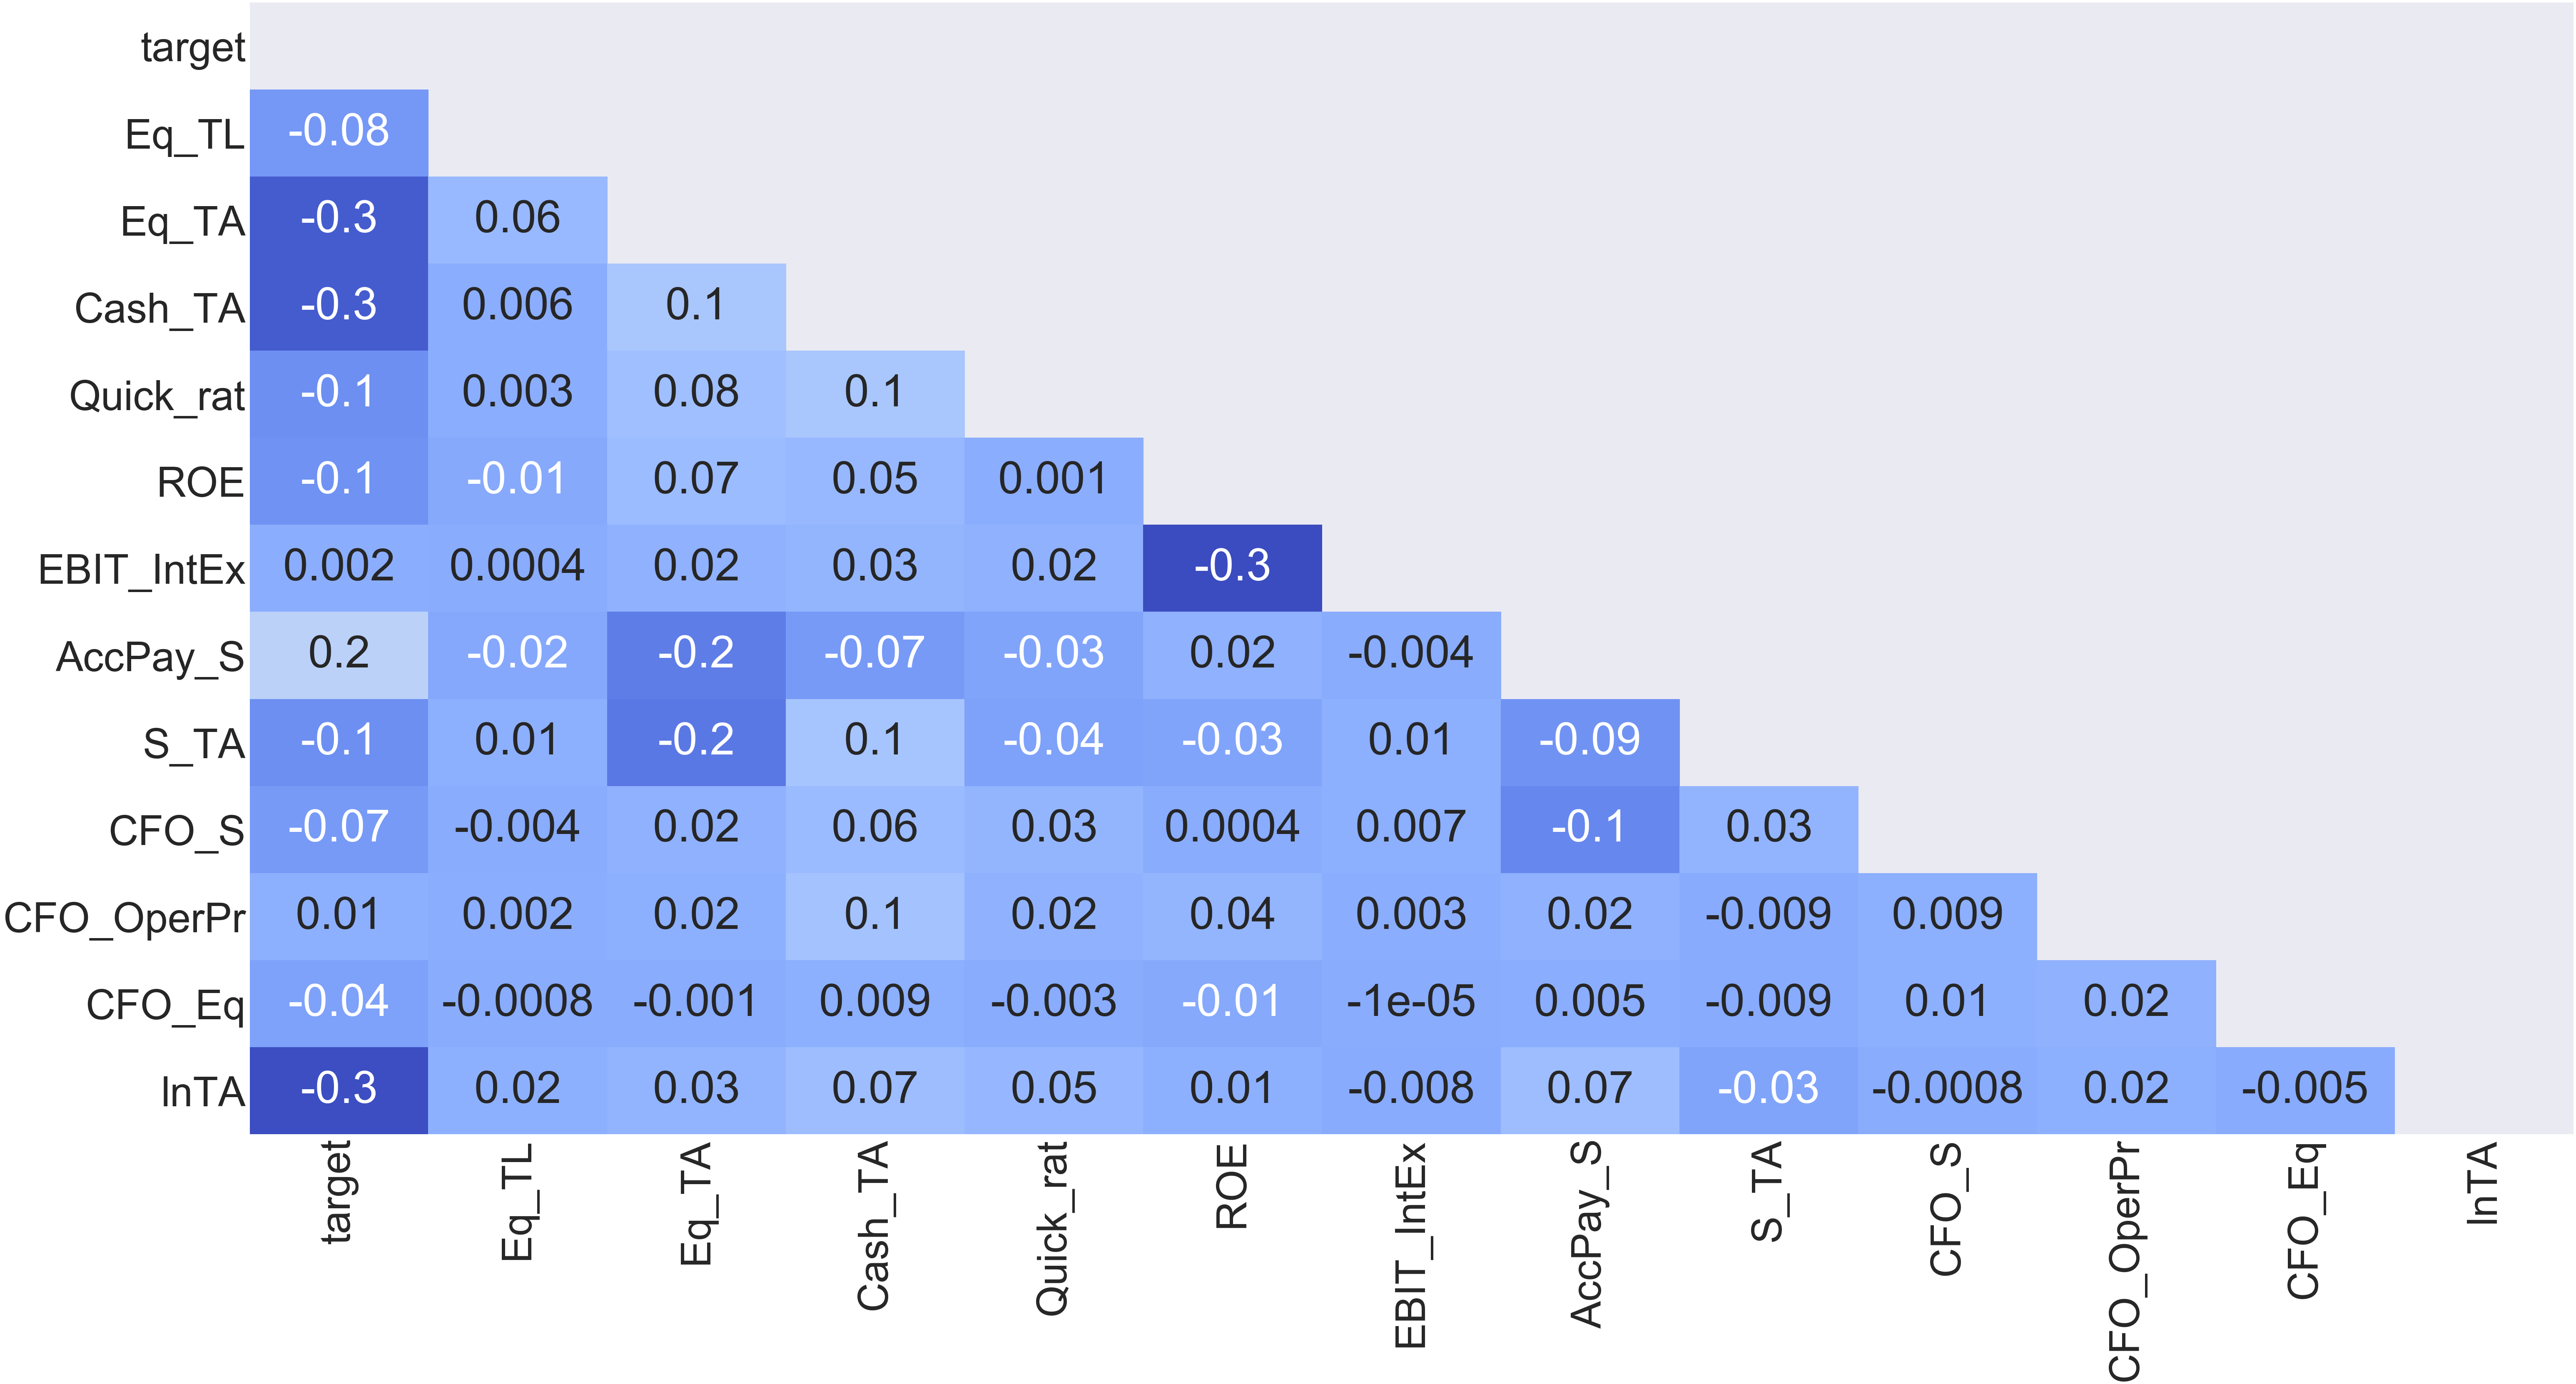

In [18]:
sns.set(font_scale=9)
f, ax = plt.subplots(figsize=(100, 50))
matrix = np.triu(df.corr(method='pearson'))
sns.heatmap(df.corr(method='pearson'), annot=True, mask=matrix, cbar = False, fmt = '.1g', cmap= 'coolwarm')